### Packages

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import shapiro
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNet

from IPython.display import Markdown, display 
def printmd(string):  
    display(Markdown(string)) 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### Datasets

In [32]:
dataset = pd.read_csv('datasets/seba_binary.csv')

images_to_drop = ["image_249.jpg", "image_465.jpg", "image_503.jpg", "image_86.jpg", "image_87.jpg",
                 "image_496.jpg", "image_70.jpg", "image_36.jpg", "image_301.jpg", "image_185.jpg",
                 "image_144.jpg", "image_12.jpg", "image_18.jpg", "image_453.jpg", "image_481.jpg",
                 "image_529.jpg", "image_559.jpg", "image_87.jpg", "image_4.jpg", "image_470.jpg",
                 "image_396.jpg"]

mask = dataset['image_name'].isin(images_to_drop)
dataset = dataset[~mask]

In [33]:
dataset.drop("image_name", axis = 1, inplace = True)

In [34]:
dataset.describe()

,s1,s2,a1,a2,a3,a4,a5,a6,a7,a8,...,d12,d13,d14,d15,d16,d17,da1,da2,da3,rating
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,...,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,1.003843,1.004555,0.527548,0.545643,0.028118,0.039071,1.055319,0.054555,0.217838,0.052054,...,1.512516,0.854401,1.974823,2.679270,1.872376,1.945807,0.090392,51.991648,0.008936,0.662261
std,0.031509,0.016953,0.110204,0.099960,0.004382,0.005846,0.180967,0.008891,0.040620,0.005656,...,0.149626,0.082323,0.266343,0.393362,0.070897,0.091178,0.031266,16.491159,0.002832,0.473287
min,0.917777,0.943274,0.174350,0.270322,0.011373,0.017181,0.609347,0.029774,0.092688,0.032657,...,1.050360,0.538252,1.178882,1.601780,1.642714,1.697587,0.036818,19.580882,0.004099,0.000000
25%,0.984277,0.993270,0.455619,0.480071,0.025398,0.035450,0.933455,0.048676,0.190349,0.048198,...,1.412347,0.799397,1.801234,2.414347,1.829070,1.885882,0.068048,38.056531,0.007066,0.000000
50%,1.001514,1.003602,0.526038,0.539828,0.028201,0.039237,1.043572,0.053635,0.214307,0.051646,...,1.526081,0.858110,1.948246,2.610803,1.870896,1.944283,0.083180,51.141502,0.008219,1.000000
75%,1.023766,1.015784,0.593823,0.609880,0.031082,0.043055,1.158175,0.059474,0.241788,0.055663,...,1.618031,0.909919,2.117548,2.880196,1.920444,2.001159,0.111079,62.460814,0.011599,1.000000
max,1.125569,1.064455,0.928222,0.965535,0.041540,0.055557,1.927977,0.083179,0.367842,0.070214,...,2.087500,1.087562,3.033221,4.515872,2.115980,2.378028,0.299122,118.458364,0.021710,1.000000


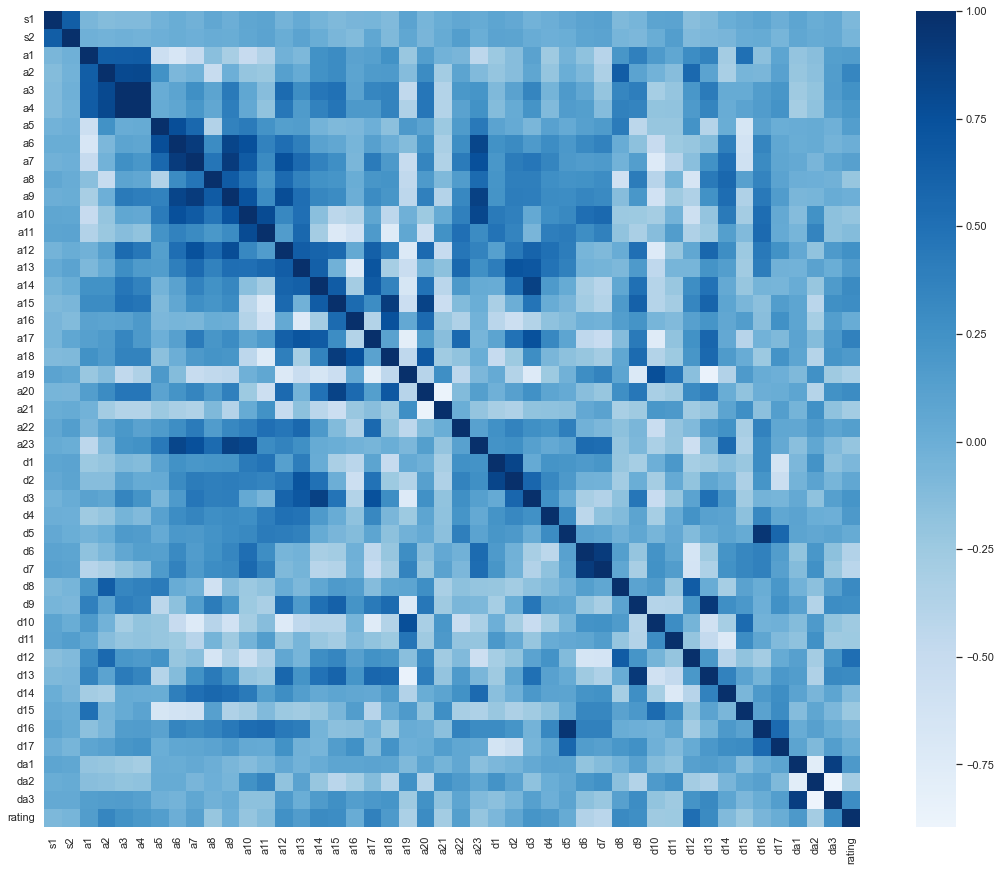

In [35]:
plt.figure(figsize=(20, 15))
sns.set(style="white")
corr = dataset.corr('pearson')
cmap = sns.diverging_palette(600, 550, as_cmap=True)
sns.heatmap(corr, cmap='Blues', center=0,
            square=True, annot = False);

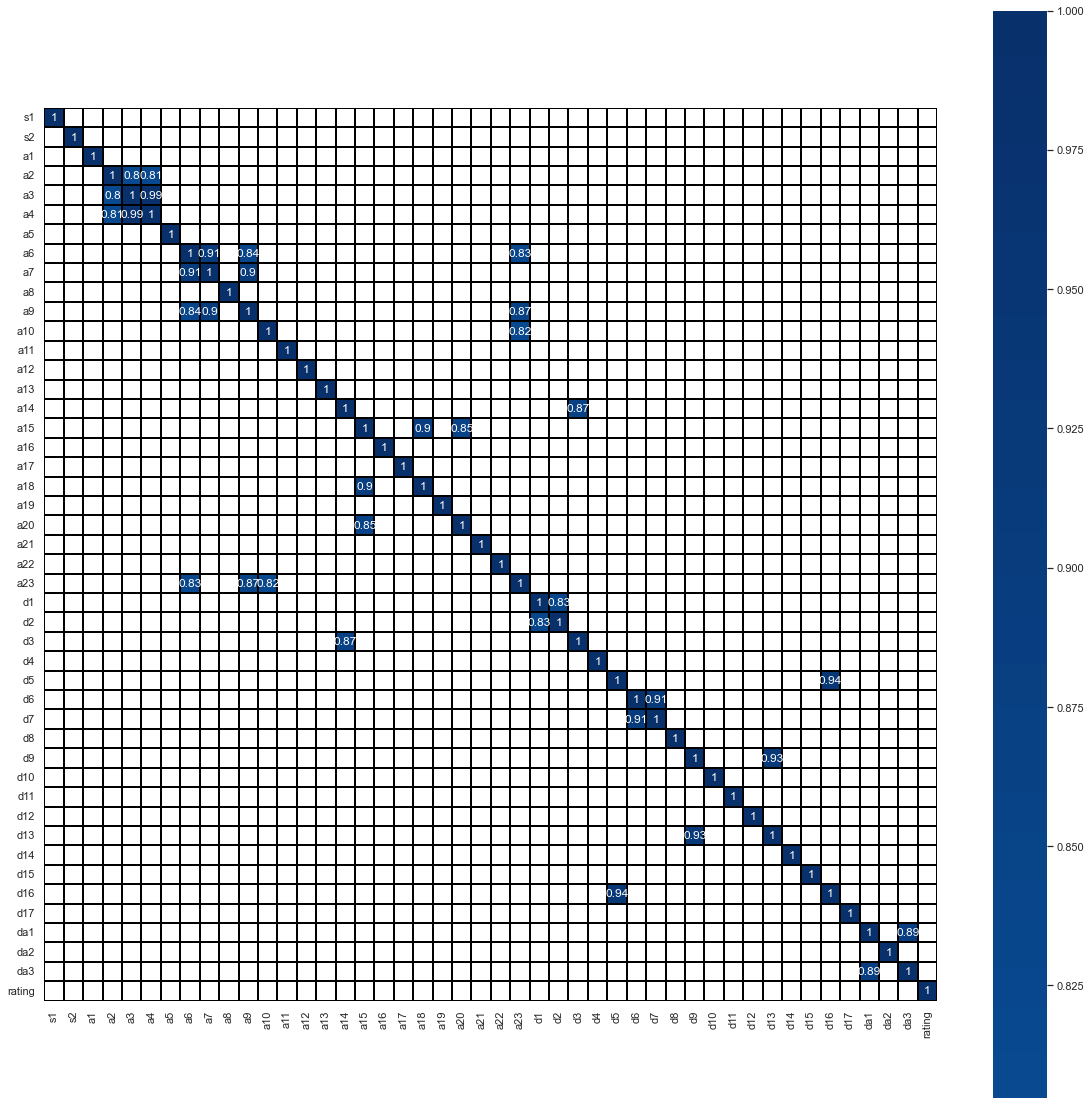

In [36]:
sns.set(style="white")
corr = dataset.corr('pearson')
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

mask = corr < 0.8

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(600, 550, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap='Blues', center=0,
            square=True, annot = True, linewidths=.2, linecolor = 'black');

In [37]:
variables_to_remove = ['a1', 'a2', 'a5', 'a6', 'a7', 'a9', 'a10', 'a13', 'a14', 'a15', 'a19', 'd9']

### Dictionary


**s1 = eye_area_symmetry** right_eye_area / left_eye_area
    

**s2 = eye_length_symmetry** right_eye_length/left_eye_length


    
#### area ratios

**a1 = eyes_to_lips** right_eye_area + left_eye_area / lip_area
    

**a2 = eyes_to_nose** right_eye_area + left_eye_area / nose_area
    

**a3 = eyes_to_face** (right_eye_area + left_eye_area) / face_area
    

**a4 = eyes_to_top_face** (right_eye_area + left_eye_area) / top_face_area
    

**a5 = lips_to_nose** lip_area / nose_area
    

**a6 = lips_to_face** lip_area / face_area
    

**a7 = lips_to_lower_face** lip_area / lower_face_area
    

**a8 = nose_to_face** nose_area / face_area
    

**a9 = eyes_lips_nose_to_face** (right_eye_area + left_eye_area + lip_area + nose_area) / face_area)
    

**a10 = eyes_lips_nose_to_inner_face** (right_eye_area + left_eye_area + lip_area + nose_area) / inner_triangle_area
    

**a11 = features_to_triangle** features_area / inner_triangle_area
    

**a12 = features_to_face** features_area / face_area
    

**a13 = features_to_outer** features_area / (left_outer_face_area + right_outer_face_area)
    

**a14= inner_to_outer** inner_triangle_area / (left_outer_face_area + right_outer_face_area)
    

**a15 = inner_to_face** inner_triangle_area / face_area
    

**a16 = outer_to_face** left_outer_face_area + right_outer_face_area) / face_area
    

**a17 = top_face_to_face** top_face_area / face_area
    

**a18 = upper_face_to_face** upper_face_area / face_area
    

**a19 = lower_face_to_face** lower_face_area / face_area
    

**a20 = bottom_face_to_face** bottom_face_area / face_area
    

**a21 = upper_to_bottom** upper_face_area / bottom_face_area
    

**a22 = vision_to_face** right_vision_area + left_vision_area / face_area


**a23 = nose_lips_eyes_to_features_area** (nose_area + right_eye_area + left_eye_area + lip_area) / features_area
    
#### distances
    

**d1 = face_length_to_width_top** face_length / face_width_at_top
    

**d2 = face_length_to_width_bottom** face_length / face_width_at_bottom
    

**d3 = face_top_to_bottom_width** face_width_at_top/face_width_at_bottom
    

**d4 = eye_distance_to_face_width** eye_distance /  face_width_at_top
    

**d5 = eyebrows_to_face_width** (right_eyebrow_length + left_eyebrow_length) / face_width_at_top
    

**d6 = mouth_to_eye_distance** mouth_length / eye_distance
    

**d7 = mouth_to_eye_spread** mouth_length / eye_outer_distance
    

**d8 = mouth_to_nose_width** mouth_length / nose_width
    

**d9 = nose_length_to_face_length** nose_length/face_length
    

**d10 = bottom_distance_to_face** chin_to_mouth_distance / face_length
    

**d11 = nose_to_mouth_to_face** mouth_to_nose_distance / face_length
       

**d12 = eye_distance_to_nose_width** eye_distance / nose_width
    

**d13 = nose_length_to_nose_to_chin_distance** nose_length / nose_to_chin_distance
    

**d14 = nose_width_to_nose_mouth_distance** nose_width / mouth_to_nose_distance


**d15 = mouth_length_to_width** mouth_length / mouth_width


**d16 = features_length_to_face_width** (right_eyebrow_length + left_eyebrow_length + mouth_length + left_eyebrow_length + right_eyebrow_length) / face_width_at_top)


**d17 = features_length_to_face_length** (right_eyebrow_length + left_eyebrow_length + mouth_length + left_eyebrow_length + right_eyebrow_length) / face_length
    
    
    
#### distances and areas
    

**da1 = eyebrows_to_eyes** (right_eyebrow_length + left_eyebrow_length) / (right_eye_area + left_eye_area))
    

**da2 = vision_to_face_width** (right_vision_area + left_vision_area) / face_width_at_top)


**da3 = features_length_to_features_area** (right_eyebrow_length + left_eyebrow_length + mouth_length + left_eyebrow_length + right_eyebrow_length) / features_area

### Data Split

In [38]:
X = dataset.drop('rating', axis = 1)
y = dataset['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27, stratify = y, shuffle = True)

In [39]:
params = {"n_estimators":[10,50,100, 200, 300],
              "max_features":['auto', 'sqrt'],
              "max_depth":[1,2,3,4],
              "min_samples_split":[1,2,5],
              "min_samples_leaf":[1,2,5],
              "bootstrap" : [True, False]}

random_forest = RandomForestClassifier()
kfold = StratifiedKFold(n_splits=5,  random_state=False, shuffle = True)

grid_search_random_forest = GridSearchCV(random_forest, params, n_jobs=5, cv=kfold,  scoring='accuracy', verbose=2, refit=True)
grid_search_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=False, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='accuracy', verbose=2)

              precision    recall  f1-score   support

           0       0.82      0.61      0.70        46
           1       0.83      0.93      0.88        91

    accuracy                           0.82       137
   macro avg       0.82      0.77      0.79       137
weighted avg       0.82      0.82      0.82       137

SCORE : 0.8248175182481752
BEST PARAMETERS : {'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 300}


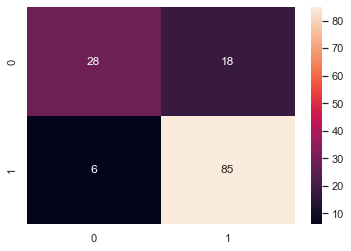

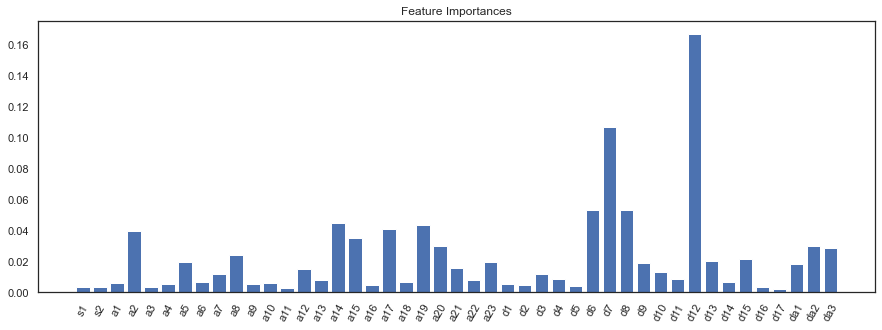

In [40]:
y_pred_6 = grid_search_random_forest.predict(X_test)

print(classification_report(y_test, y_pred_6))
print("SCORE :",grid_search_random_forest.score(X_test, y_test))
print("BEST PARAMETERS :", grid_search_random_forest.best_params_)

sns.heatmap(confusion_matrix(y_test, y_pred_6), annot = True);

plt.figure(figsize = (15,5))
plt.bar(np.arange(X.shape[1]), grid_search_random_forest.best_estimator_.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns, rotation = 60)
plt.title('Feature Importances');
plt.show()

0    478
1    224
Name: rating, dtype: int64